In [ ]:
import numpy as np

class Gridworld:
    def __init__(self):
        self.grid_size = 5
        self.start_state = (0, 0)
        self.goal_state = (4, 4)
        self.obstacles = [(2, 2), (3, 3)]
        self.state = self.start_state

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        actions = {
            0: (-1, 0),  
            1: (1, 0),   
            2: (0, -1),  
            3: (0, 1)    
        }
        next_state = (self.state[0] + actions[action][0],
                      self.state[1] + actions[action][1])

        if 0 <= next_state[0] < self.grid_size and 0 <= next_state[1] < self.grid_size:
            self.state = next_state

        if self.state == self.goal_state:
            return self.state, 100, True  
        elif self.state in self.obstacles:
            return self.state, -10, False  
        else:
            return self.state, -1, False  

env = Gridworld()
print("Initial State:", env.reset())


Initial State: (0, 0)


In [ ]:
# Q-Learning parameters
episodes = 500
alpha = 0.1   
gamma = 0.9   
epsilon = 0.2  
actions = [0, 1, 2, 3]

# Initialize Q-table
Q_table = np.zeros((5, 5, len(actions)))

# Q-Learning function
def train_gridworld(env):
    for episode in range(episodes):
        state = env.reset()
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.uniform(0, 1) < epsilon:
                action = np.random.choice(actions)
            else:
                action = np.argmax(Q_table[state[0], state[1], :])

            # Take action
            next_state, reward, done = env.step(action)

            # Update Q-value
            Q_table[state[0], state[1], action] = Q_table[state[0], state[1], action] + \
                alpha * (reward + gamma * np.max(Q_table[next_state[0], next_state[1], :]) -
                         Q_table[state[0], state[1], action])

            state = next_state

train_gridworld(env)


In [ ]:
policy = np.argmax(Q_table, axis=2)
actions_mapping = {0: '↑', 1: '↓', 2: '←', 3: '→'}

for row in policy:
    print([actions_mapping[action] for action in row])


['↓', '↓', '↓', '↓', '↓']
['→', '↓', '→', '→', '↓']
['→', '↓', '←', '→', '↓']
['→', '→', '↓', '→', '↓']
['→', '→', '→', '→', '↑']


In [ ]:
import gym
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0", render_mode="rgb_array")

print("State space:", env.observation_space)
print("Action space:", env.action_space)

state = env.reset()
env.render()


State space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
import pickle

state_bins = [20, 20]
action_space = env.action_space.n
Q_table = np.random.uniform(low=-1, high=1, size=(state_bins[0], state_bins[1], action_space))

def discretize_state(state):
    state_low = env.observation_space.low
    state_high = env.observation_space.high
    bins = [np.linspace(state_low[i], state_high[i], state_bins[i]) for i in range(len(state))]
    state_indices = [np.digitize(state[i], bins[i]) - 1 for i in range(len(state))]
    return tuple(state_indices)

# Initialize Q-learning parameters
alpha = 0.1
gamma = 0.99
epsilon = 0.2
episodes = 5000
epsilon_decay = 0.995

total_rewards = []

# Train the agent
for episode in range(episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    done = False
    total_reward = 0

    while not done:
        # Epsilon-greedy action selection
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(action_space)
        else:
            action = np.argmax(Q_table[state])

        # Take action
        next_state, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state)
        total_reward += reward

        # Update Q-value
        Q_table[state + (action,)] += alpha * (
            reward + gamma * np.max(Q_table[next_state]) - Q_table[state + (action,)]
        )
        state = next_state

    # Decay epsilon
    epsilon = max(0.01, epsilon * epsilon_decay)

    total_rewards.append(total_reward)

# Save the model as a .pkl file
model_data = {
    "Q_table": Q_table,
    "state_bins": state_bins,
    "alpha": alpha,
    "gamma": gamma,
    "epsilon_decay": epsilon_decay,
}
with open("q_learning_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved as 'q_learning_model.pkl'")


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Model saved as 'q_learning_model.pkl'


Total reward: -140.0


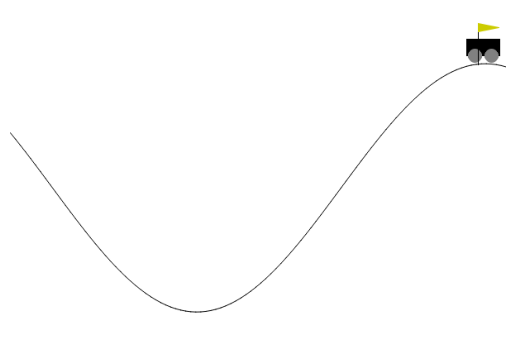

In [ ]:
from IPython.display import display, clear_output
import time

# Initialize environment
state, _ = env.reset()
state = discretize_state(state)
done = False
total_reward = 0

# Test the policy
while not done:
    action = np.argmax(Q_table[state])
    next_state, reward, done, truncated, _ = env.step(action)
    state = discretize_state(next_state)
    total_reward += reward

    # Render frame
    frame = env.render()
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.3)  

print("Total reward:", total_reward)
env.close()
